# Image Denoising 

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.metrics import binary_crossentropy
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [33]:
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_train, (-1, 28, 28, 1))

In [34]:
x_train.shape

(60000, 28, 28, 1)

In [35]:

def plot_images(images):
    fig, axes = plt.subplots(1, 5, figsize=(12, 4))
    
    for i in range(5):
        axes[i].imshow(images[i])
        axes[i].axis("off")

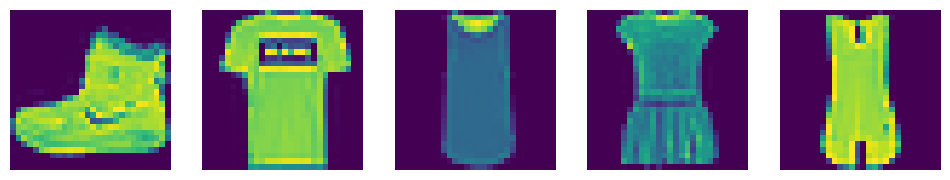

In [36]:
plot_images(x_train[:5])

# Adding noise to the images.

In [42]:
noise_factor = 0.4

x_train_noisy = x_train + noise_factor *  np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [43]:
# Split the test data.
x_test_noisy, x_val, y_test, y_val = train_test_split(x_test_noisy, x_test, test_size=0.2)

x_test_noisy.shape, x_val.shape, y_test.shape, y_val.shape

((48000, 28, 28, 1),
 (12000, 28, 28, 1),
 (48000, 28, 28, 1),
 (12000, 28, 28, 1))

In [44]:
def compare_images(images1, images2):
    fig, axes = plt.subplots(2, 5, figsize=(12, 4))

    for i in range(5):
        axes[0][i].imshow(images1[i])
        axes[1][i].imshow(images2[i])
        axes[0][i].axis("off")
        axes[1][i].axis("off")

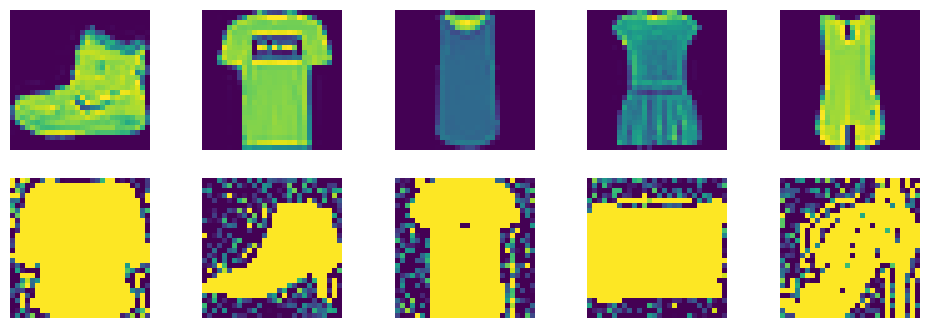

In [45]:
compare_images(x_train[:5], x_test_noisy[:5])

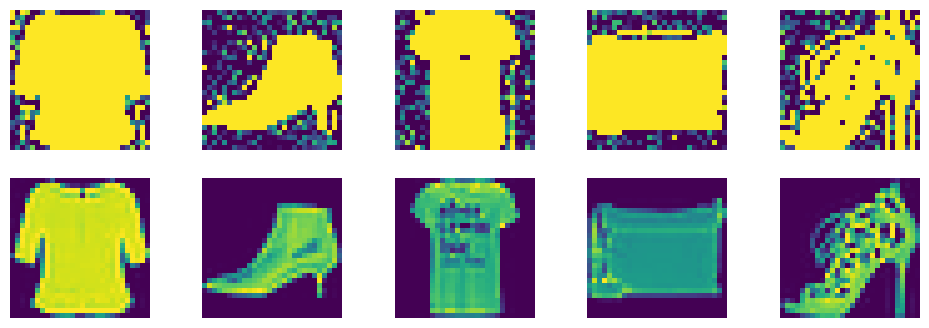

In [46]:
compare_images(x_test_noisy[:5], y_test[:5])

# Image Encoder

In [53]:
Input = layers.Input(shape=(28, 28, 1))

encoded = layers.Conv2D(activation='relu', filters=128, kernel_size=3, strides=1, padding='same')(Input)
encoded = layers.MaxPool2D()(encoded)
encoded = layers.Conv2D(activation='relu', filters=64, kernel_size=3, strides=1, padding='same')(encoded)
encoded = layers.MaxPool2D()(encoded)
encoded = layers.Conv2D(activation='relu', filters=32, kernel_size=3, strides=1, padding='same')(encoded)

In [54]:
decoded = layers.Conv2DTranspose(filters=64, activation='relu', kernel_size=3, strides=2, padding="same")(encoded)
decoded = layers.Conv2DTranspose(filters=128, activation='relu', kernel_size=3, strides=2, padding="same")(decoded)


In [55]:
autoencoder = models.Model(Input, decoded)

In [56]:
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 14, 14, 64)     │        18,496 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 28, 28, 128)    │        73,856 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,888 (726.12 KB)

 Trainable params: 185,888 (726.12 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
autoencoder.compile(loss="mse", optimizer='adam', metrics=['mse'])

In [ ]:
history = autoencoder.fit(x_train_noisy, x_train, epochs=40, shuffle=True, verbose=True, validation_data=(x_val,y_val))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 343s 183ms/step - accuracy: 0.1819 - loss: 2569.9741 - val_accuracy: 0.2088 - val_loss: 2216.9421
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 328s 175ms/step - accuracy: 0.3332 - loss: 2091.5276 - val_accuracy: 0.3895 - val_loss: 1963.2029
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 380s 174ms/step - accuracy: 0.4073 - loss: 1946.5582 - val_accuracy: 0.4231 - val_loss: 1875.5031
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 385s 175ms/step - accuracy: 0.4313 - loss: 1863.4392 - val_accuracy: 0.4365 - val_loss: 1797.0106
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 333s 178ms/step - accuracy: 0.4414 - loss: 1794.2379 - val_accuracy: 0.4463 - val_loss: 1754.8336
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 336s 179ms/step - accuracy: 0.4515 - loss: 1745.1355 - val_accuracy: 0.4512 - val_loss: 1697.5829
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 331s 177ms/step - accuracy: 0.4587 - loss: 1706.2051 - val_accuracy: 0.4601 - val_loss: 1664.1915
Epoch 8/40
1875/1875